# Democracy
* See [Rappler article](https://www.rappler.com/thought-leaders/189083-democracy-constraint-infrastructure-development) by JC Punongbayan
* Data curated by Jerome P. de Leon

Data Sources
* Global Competitiveness Report [2016-2017](https://www.weforum.org/reports/the-global-competitiveness-report-2016-2017-1)
* Democracy Index [2016](http://www.eiu.com/public/thankyou_download.aspx?activity=download&campaignid=DemocracyIndex2016)

![img](Dem1.png)

```
Figure 1. Note: Data include 136 countries. The white line in each box signifies the median value; the bottom and top edges of each box refer to the 1st and 3rd quartiles; the bottom and top lines refer to the minimum and maximum values; a dot represents an outlier (the sole outlier here is Hong Kong)
```

## Reading the data

In [13]:
#styling
import matplotlib.pyplot as pl
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'
fontsize=18

In [14]:
import pandas as pd

data=pd.read_csv('democracy.csv')

In [15]:
data.shape

(169, 21)

In [16]:
data.columns

Index(['countryname', 'countryname2', 'dscore', 'dscore1', 'dscore2',
       'dscore3', 'dscore4', 'dscore5', 'dcat', 'gcr_rank', 'gcr_score',
       'gcr1_rank', 'gcr1_score', 'gcr2_rank', 'gcr2_score', 'gcr3_rank',
       'gcr3_score', 'gcr4_rank', 'gcr4_score', '_merge', 'regime'],
      dtype='object')

In [17]:
data.head()

,countryname,countryname2,dscore,dscore1,dscore2,dscore3,dscore4,dscore5,dcat,gcr_rank,...,gcr1_rank,gcr1_score,gcr2_rank,gcr2_score,gcr3_rank,gcr3_score,gcr4_rank,gcr4_score,_merge,regime
0,North Korea,NaN,1.08,0.00,2.50,1.67,1.25,0.00,Authoritarian,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,Syria,NaN,1.43,0.00,0.00,2.78,4.38,0.00,Authoritarian,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,Chad,Chad,1.50,0.00,0.00,1.11,3.75,2.65,Authoritarian,135.0,...,136.0,2.68,137.0,1.75,105.0,4.07,131.0,3.83,3,1
3,Central African Republic,NaN,1.61,1.75,0.36,1.11,2.50,2.35,Authoritarian,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,Equatorial Guinea,NaN,1.70,0.00,0.43,2.22,4.38,1.47,Authoritarian,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


Pillars: gcr*_score columns
* gcr1_score: Institutions
* gcr2_score: Infrastructure
* gcr3_score: Macroeconomic environment
* gcr4_score: Health and primary education
* gcr5_score: Higher education and training
* gcr6_score: Goods market efficiency
* gcr7_score: Labor market efficiency
* gcr8_score: Financial market development
* gcr9_score: Technological readiness
* gcr10_score: Market size
* gcr11_score: Business sophistication
* gcr12_score: Innovation
(c.f. Fig. 2 of GC Report)

Democracy category (dcat columns):
* full
* flawed
* hybrid
* authoritarian

Democracy score meanings:
* dscore1: electoral process and pluralism, 
* dscore2: Functioning of government,
* dscore3: degree of political participation, 
* dscore4: democratic political culture, and 
* dscore5: civil liberties

Text(0.5,0,'Category')

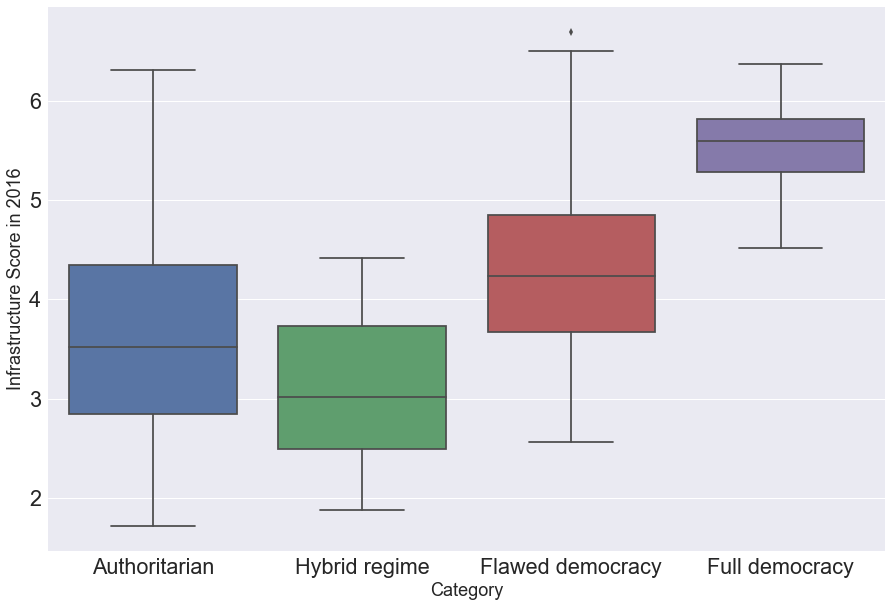

In [18]:
import seaborn as sb
#sb.set_style('whitegrid')

fig = pl.figure(figsize=(15,10))

sb.boxplot(x='dcat',y='gcr2_score', data=data)
pl.ylabel('Infrastructure Score in 2016',fontsize=fontsize)
pl.xlabel('Category',fontsize=fontsize)
#pl.xticks(rotation=45)

In [19]:
import numpy as np

infrastructure_score = {}
for group_name,group_data in data.groupby(by='dcat'):
    #compute quartiles
    quartiles = np.percentile(group_data['gcr2_score'].dropna(), [25,50,75])
    #print('{}:\t {}'.format(group_name,quartiles))
    
    #put into a dictionary
    infrastructure_score[group_name] = quartiles
    
#convert dict into a dataframe
infra = pd.DataFrame(infrastructure_score).T
infra.columns = ['25%','50%','75%']
infra

,25%,50%,75%
Authoritarian,2.8475,3.520,4.3450
Flawed democracy,3.6700,4.240,4.8500
Full democracy,5.2850,5.590,5.8100
Hybrid regime,2.4950,3.015,3.7325


## Other GCR scores/ pillar

Text(0.5,0,'Category')

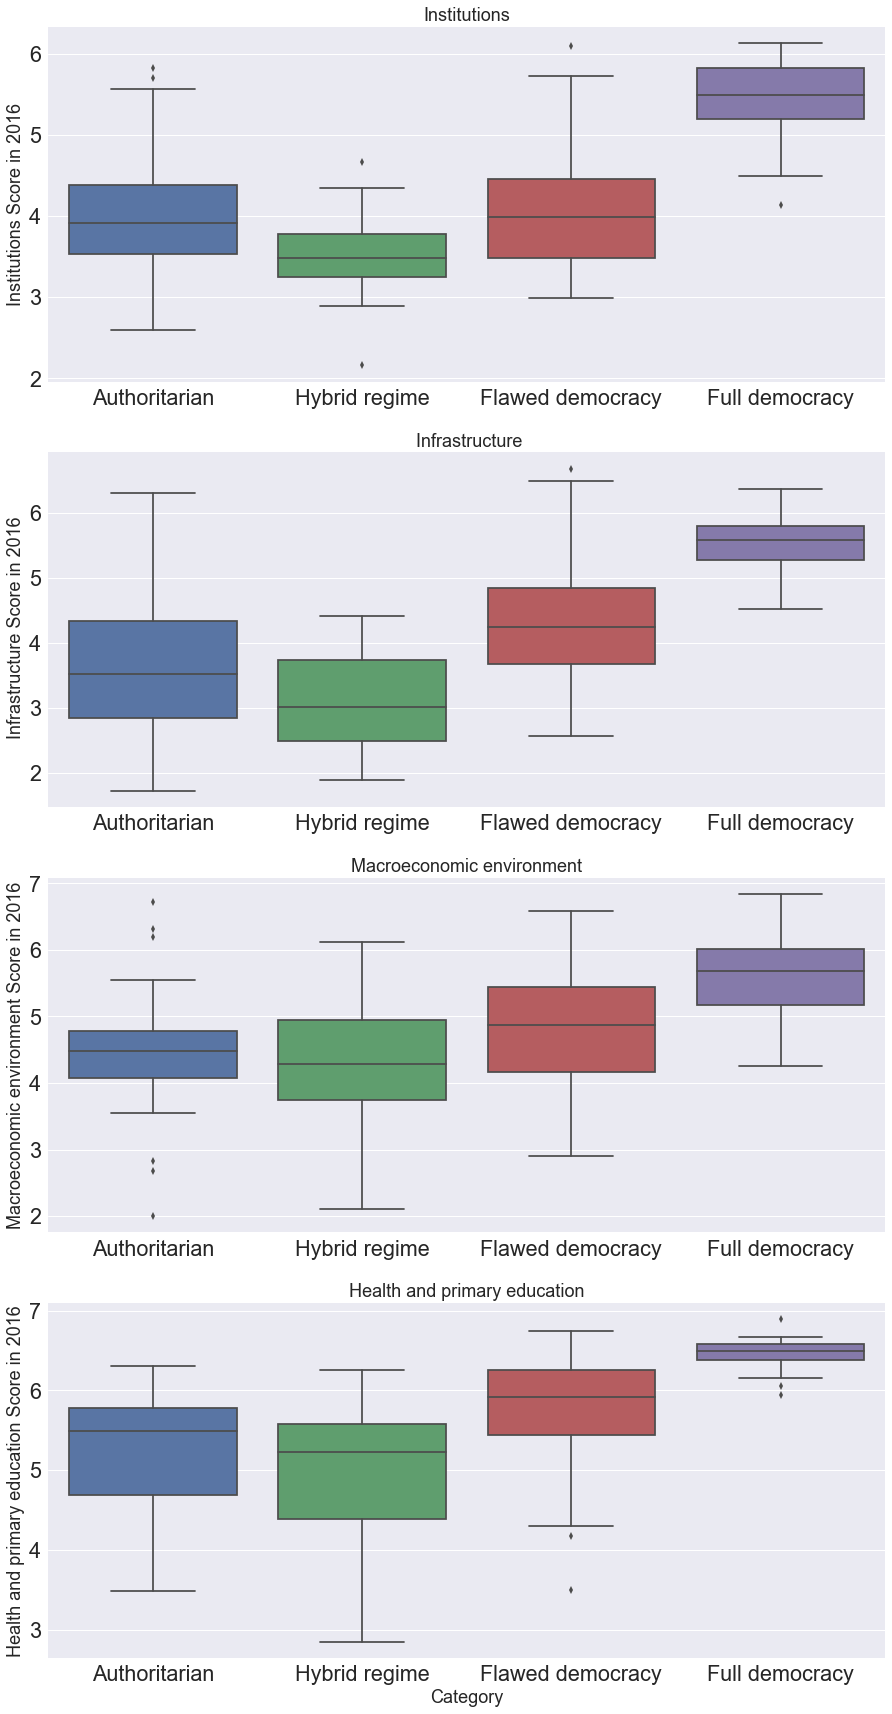

In [20]:
import seaborn as sb

fig, ax = pl.subplots(nrows=4,ncols=1,figsize=(15,30))#sharex=True

score_names = 'Institutions, Infrastructure,Macroeconomic environment,Health and primary education'.split(',')
score_label = ['gcr1_score','gcr2_score','gcr3_score','gcr4_score']

n=0
for label,name in zip(score_label,score_names):
    sb.boxplot(x='dcat',y=label, data=data,ax=ax[n])
    ax[n].set_ylabel('{} Score in 2016'.format(name),fontsize=fontsize)
    ax[n].set_xlabel('')
    ax[n].set_title(name,fontsize=fontsize)
    n+=1
    
ax[n-1].set_xlabel('Category',fontsize=fontsize)

Flawed democracy have consistently lower median scores than other regimes followed by Authoritarian regimes. 

## What countries have which democracy type?

In [21]:
data['dcat'].value_counts()

Flawed democracy    57
Authoritarian       51
Hybrid regime       40
Full democracy      19
Name: dcat, dtype: int64

## Global Competitiveness Rank (GCR)

In [22]:
#top10
data.sort_values(by='gcr_rank')[['countryname','gcr_rank','dcat']][:10]

,countryname,gcr_rank,dcat
97,Singapore,1.0,Flawed democracy
159,Switzerland,2.0,Full democracy
99,Hong Kong SAR,3.0,Flawed democracy
155,Netherlands,4.0,Full democracy
32,Qatar,5.0,Authoritarian
166,Norway,6.0,Full democracy
164,Sweden,7.0,Full democracy
163,New Zealand,8.0,Full democracy
156,Luxembourg,9.0,Full democracy
154,Germany,10.0,Full democracy


In [23]:
#bottom10
data.sort_values(by='gcr_rank')[['countryname','gcr_rank','dcat']].dropna()[-10:]

,countryname,gcr_rank,dcat
59,Sierra Leone,129.0,Hybrid regime
17,Burundi,130.0,Authoritarian
48,Mauritania,131.0,Authoritarian
74,Liberia,132.0,Hybrid regime
51,Mozambique,133.0,Hybrid regime
60,Venezuela,134.0,Hybrid regime
2,Chad,135.0,Authoritarian
58,Nigeria,136.0,Hybrid regime
76,Malawi,137.0,Hybrid regime
11,Yemen,138.0,Authoritarian


## Summarize democracy scores with some statistic

* gcr1_score: Institutions
* gcr2_score: Infrastructure
* gcr3_score: Macroeconomic environment
* gcr4_score: Health and primary education

In [24]:
cols = 'dscore1,dscore1,dscore2,dscore4'.split(',')
data[cols].describe()

,dscore1,dscore1,dscore2,dscore4
count,167.000000,167.000000,167.000000,167.000000
mean,5.926527,5.926527,4.911617,5.612695
std,3.521920,3.521920,2.490249,1.678793
min,0.000000,0.000000,0.000000,1.250000
25%,2.835000,2.835000,2.930000,4.380000
50%,7.000000,7.000000,5.360000,5.630000
75%,9.170000,9.170000,6.965000,6.880000
max,10.000000,10.000000,9.640000,10.000000
